## This notebook does some exploratory analyses of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA

from ipywidgets import FloatProgress
from IPython.display import display
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Explore pre-assessment data

In [83]:
# read in pre-assessment answers data, user data, and sleep tracker data
answers_long = pd.read_csv("//Users/Maime/Dropbox/Me/Insight/Shleep/answers_long.csv")
users_wide = pd.read_csv("/Users/Maime/Dropbox/Me/Insight/Shleep/users_wide.csv")
users_anon = pd.read_csv("/Users/Maime/Dropbox/Me/Insight/Shleep/user_data/users-anon.csv")
sleep_wide = pd.read_csv("/Users/Maime/Dropbox/Me/Insight/Shleep/sleep_tracker_wide.csv")
sleep_long = pd.read_csv("/Users/Maime/Dropbox/Me/Insight/Shleep/lme_sleep.csv")


First, we can look at the distribution of age and hours of sleep according to weekday and weekend. <br>
As expected, age is right-skewed, with majority of users between the teens and 40 years old.

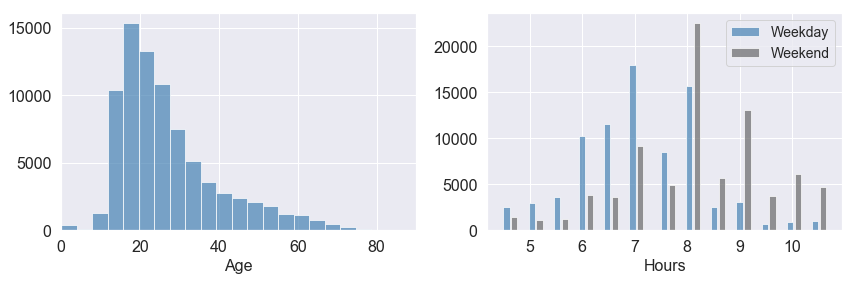

In [4]:
fig = plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
p = sns.distplot( users_wide['age'], color='steelblue', kde=False, bins = 30, hist_kws={'alpha': .7})
plt.xlabel('Age', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize = 16)
plt.xlim([0, 90])

plt.subplot(1,2,2)
shift = .15
p = sns.distplot( users_wide['sleep_wkdy'], color='steelblue', label = 'Weekday', kde=False, 
                hist_kws={'alpha': .7})
p = sns.distplot( users_wide['sleep_wknd'] + shift, color='dimgrey', label = 'Weekend', kde=False,
                hist_kws={'alpha': .7})
plt.xlabel('Hours', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize = 16)

plt.legend(prop={'size': 14});

We can also look at the distribution of answers for certain questions in the pre-assessment (the ones regarding sleep habits and sleep problems are all categorical).

In [22]:
def plt_answers(q_id):
    tmp = answers_long[answers_long['question_id'] == q_id]
    p = sns.countplot(x = "value", data = tmp,
                 order = tmp['value'].value_counts().index)
    for item in p.get_xticklabels():
        item.set_rotation(45)
        item.set_ha('right')
    if q_id == 58:
        p.set_xlabel('Gender')
    elif q_id == 59:
        p.set_xlabel('When do you feel sleepy?')
    elif q_id == 60:
        p.set_xlabel('How often do you feel sleepy?')
    elif q_id == 61:
        p.set_xlabel('What do you want to get out of this app?')
    elif q_id == 62:
        p.set_xlabel('What problems do you have with sleep?')
    elif q_id == 63:
        p.set_xlabel('How often do you have sleep trouble?')
    elif q_id == 64:
        p.set_xlabel('Do you use an alarm?')
    elif q_id == 65:
        p.set_xlabel('Do you snooze your alarm in the morning?')
    elif q_id == 66:
        p.set_xlabel('How many times do you snooze the alarm?')
    elif q_id == 67:
        p.set_xlabel('What is the temperature like in your bedroom?')
    elif q_id == 68:
        p.set_xlabel('How noisy is your bedroom?')
    elif q_id == 69:
        p.set_xlabel('How bright is your bedroom?')
    elif q_id == 70:
        p.set_xlabel('Do you keep your phone in your bedroom?')
    elif q_id == 72:
        p.set_xlabel('Do you check emails in your bedroom?')
    elif q_id == 73:
        p.set_xlabel('How often are you stressed?')
    plt.show()

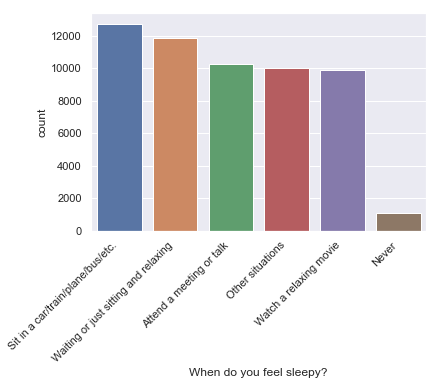

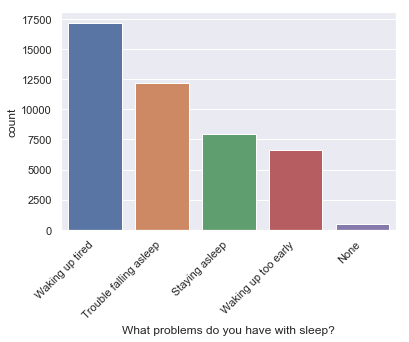

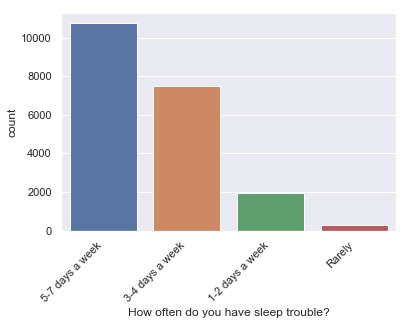

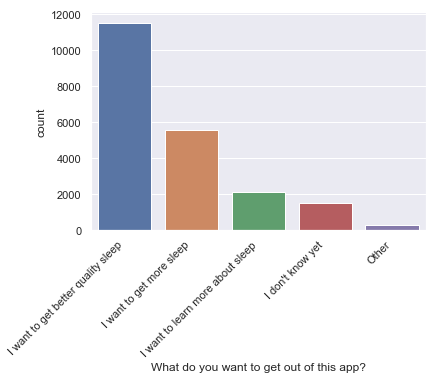

In [21]:
plt_answers(59)
plt_answers(62)
plt_answers(63)
plt_answers(61)


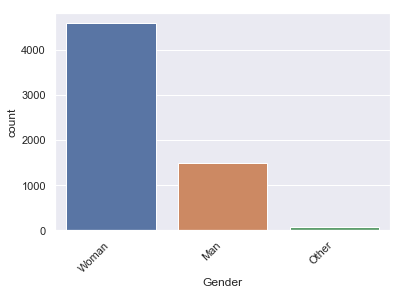

In [23]:
# gender
plt_answers(58)

# User retention

Plot user retention across time points: account creation, finishing pre-assessment, trying out sleep tracker at least once, using sleep tracker more than once. Separate into men and women. <br>
The majority of women finish the pre-assessment, but over half of the men do not.

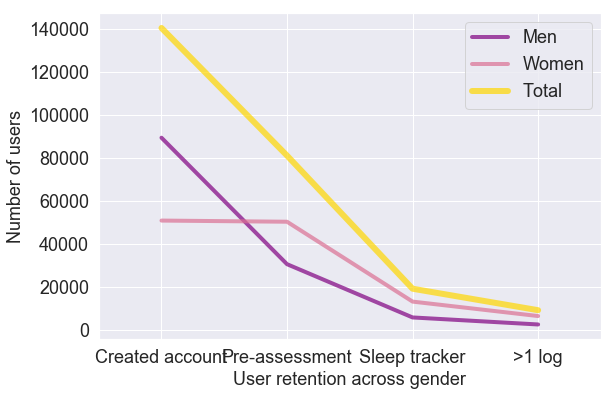

In [44]:
# do the same thing with line plots
colors = ['purple', 'palevioletred', 'gold']

created = users_anon['gender'].value_counts()
preassess = users_wide['gender_female'].value_counts()
tracker = sleep_wide['gender_female'].value_counts()
tracker_engage = sleep_wide.loc[sleep_wide['log_counts'] > 1, 'gender_female'].value_counts()
male = np.array([created[0], preassess[0], tracker[0], tracker_engage[0]])
female = np.array([created[1], preassess[1], tracker[1], tracker_engage[1]])
total = male + female

indices = np.array(range(1,5))

# line plot
fig = plt.figure(figsize=(9, 6))
axes = plt.plot(indices, male, color = colors[0], label ='Men', alpha = .7, linewidth = 4)
axes = plt.plot(indices, female, color = colors[1], label = 'Women', alpha = .7, linewidth = 4)
p = plt.plot(indices, total, color= colors[2], label = 'Total', alpha = .7, linewidth = 6)
plt.xticks(indices, ('Created account', 'Pre-assessment', 'Sleep tracker', '>1 log'))
plt.tick_params(axis='both', which='major', labelsize = 18)
plt.xlabel('User retention across gender', fontsize = 18)
plt.ylabel('Number of users', fontsize = 18)
plt.xlim([.5, 4.5])
plt.legend(prop={'size': 18}, numpoints = 1)
plt.show();


Now look at retention across age. Segmented age into 

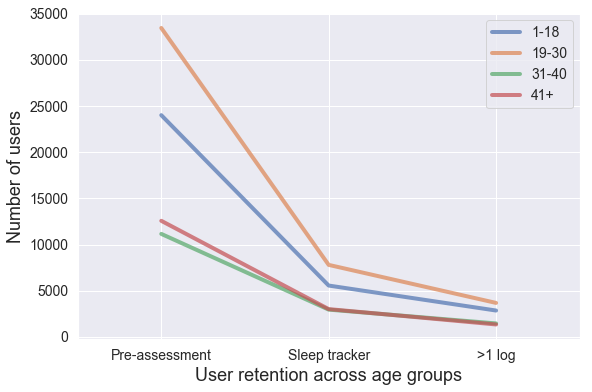

In [42]:
# look at user retention across age
sleep_wide = sleep_wide.merge(users_wide[['user_id', 'age_group']], on = 'user_id', how = 'left')
preassess = users_wide['age_group'].value_counts()
tracker = sleep_wide['age_group'].value_counts()
tracker_engage = sleep_wide.loc[sleep_wide['log_counts'] > 1, 'age_group'].value_counts()
teens = np.array([preassess[0], tracker[0], tracker_engage[0]])
twenties = np.array([preassess[1], tracker[1], tracker_engage[1]])
thirties = np.array([preassess[2], tracker[2], tracker_engage[2]])
fortyplus = np.array([preassess[3], tracker[3], tracker_engage[3]])

indices = np.array(range(1,4))

# line plot
fig = plt.figure(figsize=(9, 6))
axes = plt.plot(indices, teens, label='1-18', alpha = .7, linewidth = 4)
axes = plt.plot(indices, twenties, label='19-30', alpha = .7, linewidth = 4)
axes = plt.plot(indices, thirties, label='31-40', alpha = .7, linewidth = 4)
axes = plt.plot(indices, fortyplus, label='41+', alpha = .7, linewidth = 4)
plt.xticks(indices, ('Pre-assessment', 'Sleep tracker', '>1 log'))
plt.tick_params(axis='both', which='major', labelsize = 14)
plt.xlabel('User retention across age groups', fontsize = 18)
plt.ylabel('Number of users', fontsize = 18)
plt.xlim([.5, 3.5])
plt.legend(prop={'size': 14}, numpoints = 1)

plt.show();


Distribution of account age (in days).

Text(0.5,0,'Account age (days)')

18492

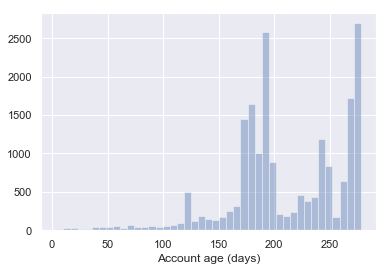

In [46]:
# look at account age
sns.set_style('darkgrid')
p = sns.distplot(sleep_wide['account_age'], kde = False)
p.set_xlabel('Account age (days)')


# Explore sleep tracker data

First, we can look at number of sleep entries across weekdays. There are more entries during the weekdays, and fewer entries during the weekend.

Text(0.5,0,'Distribution of sleep logs: day of the week')

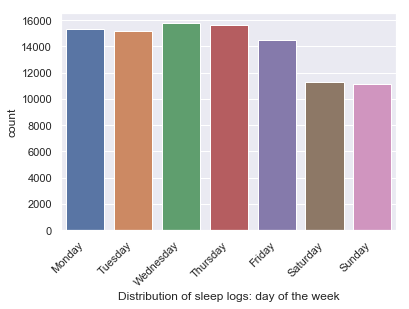

In [86]:
# make countplot of weekdays
sns.set(style="darkgrid")
p = sns.countplot(sleep_long['day_of_week'],
                 order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
for item in p.get_xticklabels():
    item.set_rotation(45)
    item.set_ha('right')
p.set_xlabel('Distribution of sleep logs: day of the week')

Below shows sleep log counts and days in sleep tracker per user, excluding users who only tried the sleep tracker once. Even with this truncation, the majority of people only try it out a few times. Very few people have more than 50 entries and spend more than 50 days in the tracker.

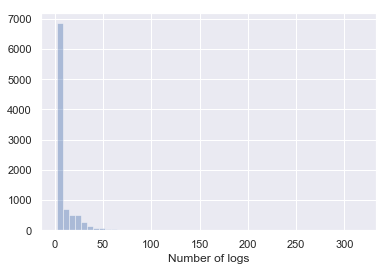

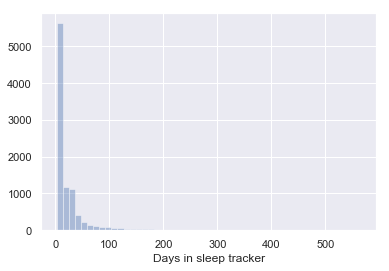

In [93]:
p = sns.distplot(sleep_wide.loc[sleep_wide['log_counts'] > 1, 'log_counts'], kde = False, bins = 50)
p.set_xlabel('Number of logs')
plt.show()

p = sns.distplot(sleep_wide.loc[sleep_wide['days_in_app'] > 1, 'days_in_app'], kde = False, bins = 50)
p.set_xlabel('Days in sleep tracker');

We can also look at the distribution of hours of sleep reported in the sleep tracker, and the quality ratings of sleep users gave. 

Text(0.5,17.2469,'Distribution of sleep hours')

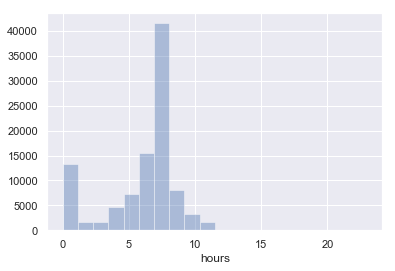

Text(0.5,17.2469,'Distribution of ratings')

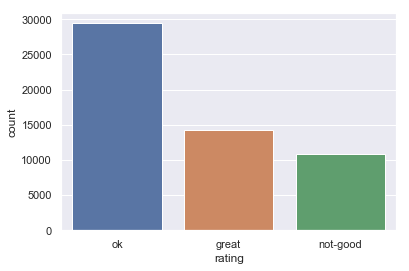

In [100]:
sns.distplot(sleep_long['hours'], kde = False, bins = 20)
p.set_xlabel('Distribution of sleep hours')
plt.show()

sns.countplot(x = 'rating', data = sleep_long)
p.set_xlabel('Distribution of ratings')
plt.show()

## Look at behavior in sleep tracker just in first two weeks.

In [122]:
# create new df_long with just users with accounts over X months
df = sleep_wide[sleep_wide['account_age'] > 60]
users = df['user_id'].unique()
df_long = sleep_long[sleep_long['user_id'].isin(users)]

In [ ]:
# look at first 2 weeks of engagement (logs per day)
days = 14
beginning_df = df_long[df_long['days_since'] <= days]
beginning_df = beginning_df.set_index('user_id')
beginning_df['user_id'] = beginning_df.index.values

# make beginning_wide for first 2 weeks (include num_logs, first_log, days_in_app, mean_hours, mode_ratings)
# initialize wide dataframe
users = beginning_df['user_id'].unique()
colnames = ['user_id', 'log_counts','days_in_app', 'first_log', 'mean_hours', 'mode_ratings']
beginning_wide = pd.DataFrame(index = users, columns = colnames)

# fill in user_id
beginning_wide['user_id'] = users

gp = beginning_df.groupby('user_id')

f = FloatProgress(min=0, max=len(gp.groups)) # instantiate the bar
display(f) # display the bar

start = time.time()
for user in gp.groups:
    # current user's sleep tracker data
    tmp = beginning_df.loc[[user]]
    # first day current user logged sleep
    tmp_firstlog = tmp['date_only'].iloc[0]
    beginning_wide.loc[user, 'first_log'] = tmp_firstlog
    # how many logs (in first two weeks) for current user
    beginning_wide.loc[user, 'log_counts'] = len(tmp)
    # how many days in app (out of first two weeks) for current user
    tmp_lastday = tmp['date_only'].iloc[len(tmp) - 1]
    tmp_daysinapp = (pd.to_datetime(tmp_lastday) - pd.to_datetime(tmp_firstlog)).days + 1
    beginning_wide.loc[user, 'days_in_app'] = tmp_daysinapp
    # mean hours
    beginning_wide.loc[user, 'mean_hours'] = np.mean(tmp['hours'])
    # mode rating
    try:
        beginning_wide.loc[user, 'mode_ratings'] = tmp['rating'].mode()[0]
    except:
        beginning_wide.loc[user, 'mode_ratings'] = np.nan
        
    f.value += 1 # signal to increment the progress bar
    time.sleep(.1)
        
end = time.time()

print(end - start) # took about 37 min to run

In [106]:
# ONLY use people who had MORE THAN ONE entry in first two weeks
beginning_wide = beginning_wide[beginning_wide['log_counts'] > 1]

Below shows the distribution of number of sleep logs per user in the first two weeks, for those users who had more than one entry in those first two weeks.

(0, 15)

Text(0.5,0,'Log counts in sleep tracker in first 2 weeks')

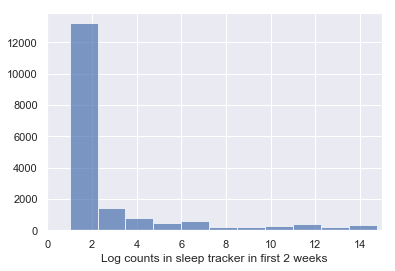

In [117]:
p = sns.distplot(beginning_wide['log_counts'] , bins = 20, kde = False, 
             hist_kws={'alpha': .7})
plt.xlim(0, 15)
p.set_xlabel('Log counts in sleep tracker in first 2 weeks')

We can also look at the distribution of the number of users across total number of weeks in sleep tracker. The majority of users spend less than 5 weeks in the sleep tracker. There is a big dropoff in users past the 6 week mark. Therefore, we can segment users based on engagement past the 6 week mark, and try to predict whether they will churn, have low engagement, or still be highly engaged past the 6 week point.

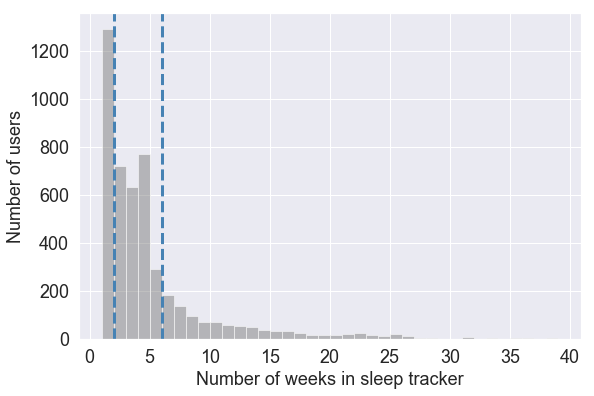

In [150]:
# look at number of users across days (or weeks?)
fig = plt.figure(figsize=(9, 6))
binsz = range(1, 40)
tmp = sleep_wide.loc[sleep_wide['days_in_app'] > 1, 'weeks_in_app']
sns.distplot(tmp , color="gray", kde = False, bins=binsz,
             hist_kws={'alpha': .5})
# plot vertical lines
xposition = [2, 6]
for xc in xposition:
    plt.axvline(x=xc, color='steelblue', linestyle='--', linewidth = 3)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Number of weeks in sleep tracker', fontsize = 18)
plt.ylabel('Number of users', fontsize = 18);


## Compare to behavior 6 weeks out
We can look at behavior 6 weeks out, using a 30 day window.

In [123]:
# look at engagement 6 weeks out (30 day window)
day = 42
window = 30
later_df = df_long[(df_long['days_since'] > day) & (df_long['days_since'] < (day + window))]
later_df = later_df.set_index('user_id')
later_df['user_id'] = later_df.index.values
later_df = later_df.drop(columns=['user_id.1'])

In [ ]:
# make later_wide for 6 weeks out
# initialize wide dataframe
users = later_df['user_id'].unique()
colnames = ['user_id', 'log_counts','days_in_app', 'first_log', 'mean_hours', 'mode_ratings']
later_wide = pd.DataFrame(index = users, columns = colnames)

# fill in user_id
later_wide['user_id'] = users

gp = later_df.groupby('user_id')

f = FloatProgress(min=0, max=len(gp.groups)) # instantiate progress bar
display(f) # display the bar

start = time.time()
for user in gp.groups:
    # current user's sleep tracker data
    tmp = later_df.loc[[user]]
    # first day current user logged sleep
    tmp_firstlog = tmp['date_only'].iloc[0]
    later_wide.loc[user, 'first_log'] = tmp_firstlog
    # how many logs (in first two weeks) for current user
    later_wide.loc[user, 'log_counts'] = len(tmp)
    # how many days in app (out of first two weeks) for current user
    tmp_lastday = tmp['date_only'].iloc[len(tmp) - 1]
    tmp_daysinapp = (pd.to_datetime(tmp_lastday) - pd.to_datetime(tmp_firstlog)).days + 1
    later_wide.loc[user, 'days_in_app'] = tmp_daysinapp
    # mean hours
    later_wide.loc[user, 'mean_hours'] = np.mean(tmp['hours'])
    # mode rating
    try:
        later_wide.loc[user, 'mode_ratings'] = tmp['rating'].mode()[0]
    except:
        later_wide.loc[user, 'mode_ratings'] = np.nan
        
    f.value += 1 # signal to increment the progress bar
    time.sleep(.1)
        
end = time.time()

print(end - start) # took about 1 min to run

## Segment users based on number of sleep logs past 6 week mark, into 3 classes.

369

396

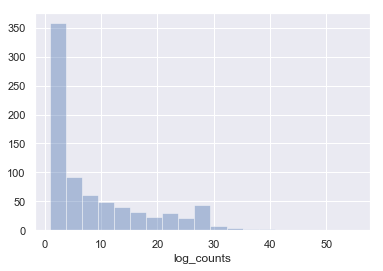

In [130]:
sns.distplot(later_wide['log_counts'], kde = False)
cutoff = 5
len(later_wide[later_wide['log_counts'] >= cutoff])
len(later_wide[later_wide['log_counts'] < cutoff])

In [134]:
# create classes based on number of logs for 1.5 months out in later_wide

med = 4
cut_points = [med]
labels = ['low', 'high']
later_wide['engagement'] = binning(later_wide['log_counts'], cut_points, labels)

# assign engagement classes
categories = np.array(['low', 'high'])
later_wide.engagement = pd.Categorical(later_wide.engagement, categories=categories)

In [153]:
# join with beginning_wide
tmplater = later_wide[['user_id', 'engagement']]
tmpbeg = beginning_wide.loc[beginning_wide['log_counts'] > 1, ['user_id', 'log_counts', 'days_in_app', 'mean_hours']]

# left join
df_engagement = tmpbeg.merge(tmplater, on = 'user_id', how = 'left')
df_engagement = df_engagement.set_index('user_id')
df_engagement['user_id'] = df_engagement.index.values

# fill NaN in engagement with 'dropped'
df_engagement['engagement'] = df_engagement['engagement'].cat.add_categories(['dropped'])
df_engagement['engagement'] = df_engagement['engagement'].fillna('dropped')


In [139]:
# get user_ids for each of these engagement classes
beginning_users = beginning_wide['user_id']
dropped_users = df_engagement[(df_engagement['engagement'] == 'dropped').values]['user_id']
low_users = df_engagement[(df_engagement['engagement'] == 'low').values]['user_id']
high_users = df_engagement[(df_engagement['engagement'] == 'high').values]['user_id']

shared_high = np.intersect1d(beginning_users, high_users)
high = df_engagement.loc[df_engagement['user_id'].isin(shared_high)]

shared_low = np.intersect1d(beginning_users, low_users)
low = df_engagement.loc[df_engagement['user_id'].isin(shared_low)]

shared_dropped = np.intersect1d(beginning_users, dropped_users)
dropped = df_engagement.loc[df_engagement['user_id'].isin(shared_dropped)]

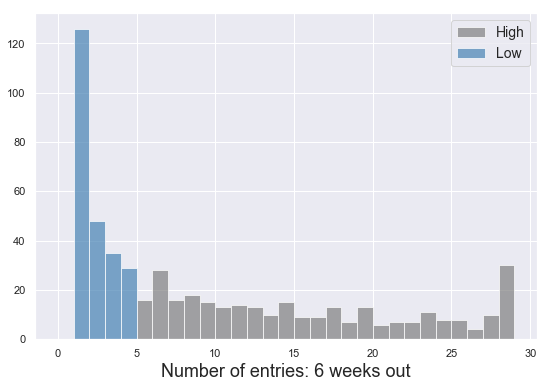

In [142]:
# plot of segmentation according to engagement after 6 weeks
# look at log counts for 6 weeks out from later_wide
colors = ['steelblue', 'gray']
fig = plt.figure(figsize=(9, 6))
binsz = range(0, 30, 1)
tmp = later_wide[later_wide['user_id'].isin(np.append(shared_high, shared_low))]
low = tmp[tmp['engagement'] == 'low']['log_counts']
high = tmp[tmp['engagement'] == 'high']['log_counts']

sns.distplot( high , color= colors[1], label="High", kde = False, bins=binsz,
             hist_kws={'alpha': .7})
sns.distplot( low , color=colors[0], label="Low", kde = False, bins=binsz,
             hist_kws={'alpha': .7})

plt.xlabel('Number of entries: 6 weeks out', fontsize = 18)

plt.legend(prop={'size': 14});


### Pie chart of user segmentation

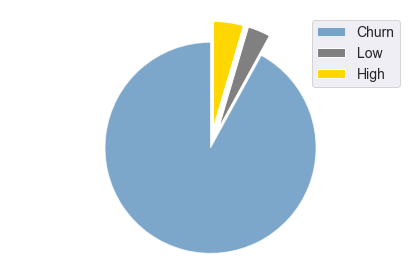

In [152]:
# pie plot of user segmentation

labels = ['Churn', 'Low', 'High']
sizes = [7515, 280, 373]
colors = ['steelblue', 'gray', 'gold']
explode = (0, 0.2, 0.2)
patches, texts = plt.pie(sizes, colors=colors, shadow=False, startangle=90, explode = explode,
                        pctdistance=1.2)
patches[0].set_alpha(.7) # wedge opacity
for i in range(0,3):
    texts[i].set_fontsize(16) # label size
plt.legend(patches, labels, loc="upper right", prop = {'size': 14})
plt.axis('equal')
plt.tight_layout()
plt.show();